<br>
# ** 6 Predict the Stock**
FB prophet

<br><br>
## ** 1 fb - prophet 모듈의 활용**
https://research.fb.com/prophet-forecasting-at-scale/

<br>
### ** 01 주가 데이터 가져오기**
> from pandas_datareader import get_data_yahoo

In [1]:
from pandas_datareader import get_data_yahoo
stock = get_data_yahoo('MS', '2016-07-01')
stock = stock.fillna('ffill')
stock = stock.dropna()
price = stock.Close
price.tail(3)

Date
2018-06-06    51.910000
2018-06-07    52.139999
2018-06-08    51.910000
Name: Close, dtype: float64

<br>
### ** 02 prophet 모델 만들기**

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [3]:
df         = stock.reset_index()
df.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-06-30,26.00,25.18,25.34,25.98,19736300.0,24.929396
1,2016-07-01,26.40,25.76,25.77,25.92,8863400.0,24.871824
2,2016-07-05,25.57,24.83,25.50,25.00,13317300.0,23.989031


In [4]:
df         = df[['Date', 'Close']]
df.head()

,Date,Close
0,2016-06-30,25.980000
1,2016-07-01,25.920000
2,2016-07-05,25.000000
3,2016-07-06,25.150000
4,2016-07-07,25.690001


In [5]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2016-06-30,25.980000
1,2016-07-01,25.920000
2,2016-07-05,25.000000
3,2016-07-06,25.150000
4,2016-07-07,25.690001


In [6]:
df['y']    = np.log(df['y'])
df.head()

,ds,y
0,2016-06-30,3.257327
1,2016-07-01,3.255015
2,2016-07-05,3.218876
3,2016-07-06,3.224858
4,2016-07-07,3.246102


In [7]:
m = Prophet(yearly_seasonality = True)
m

In [8]:
m.fit(df)
print('done')

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/markbaum/Python/python/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


done


<br>
### ** 03 예측 데이터 생성하기**
df_predict

In [9]:
num_days = 10
future   = m.make_future_dataframe(periods = num_days)
future[:10]

,ds
0,2016-06-30
1,2016-07-01
2,2016-07-05
3,2016-07-06
4,2016-07-07
5,2016-07-08
6,2016-07-11
7,2016-07-12
8,2016-07-13
9,2016-07-14


In [10]:
forecast = m.predict(future)
forecast.head(3)

/home/markbaum/Python/python/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/home/markbaum/Python/python/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2016-06-30,3.241768,3.214768,3.271101,3.241768,3.241768,0.001743,0.001743,0.001743,0.001743,0.001743,0.001743,-0.000989,-0.000989,-0.000989,0.002732,0.002732,0.002732,3.243511
1,2016-07-01,3.245360,3.217469,3.274801,3.245360,3.245360,0.001345,0.001345,0.001345,0.001345,0.001345,0.001345,-0.001206,-0.001206,-0.001206,0.002551,0.002551,0.002551,3.246705
2,2016-07-05,3.259726,3.230199,3.289376,3.259726,3.259726,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.000024,-0.002975,-0.002975,-0.002975,0.002950,0.002950,0.002950,3.259702


In [11]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')

/home/markbaum/Python/python/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


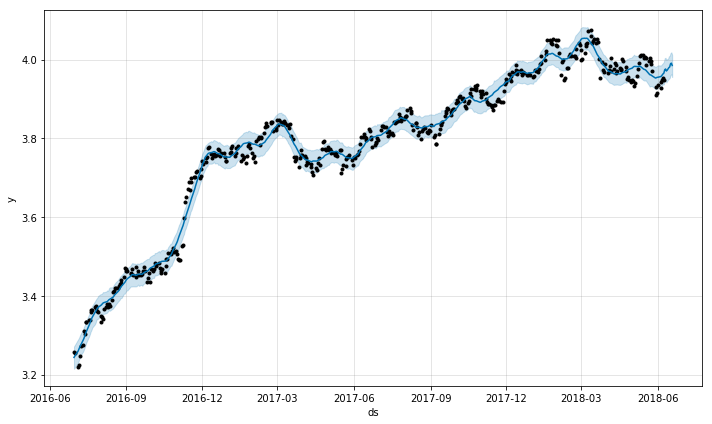

In [12]:
plt      = m.plot(forecast)
plt.show()

In [13]:
forecast.yhat[:10]

0    3.243511
1    3.246705
2    3.259702
3    3.264950
4    3.270047
5    3.274292
6    3.287305
7    3.292126
8    3.298538
9    3.304699
Name: yhat, dtype: float64

In [14]:
forecast['Close'] = round(np.exp(forecast.yhat), 2)

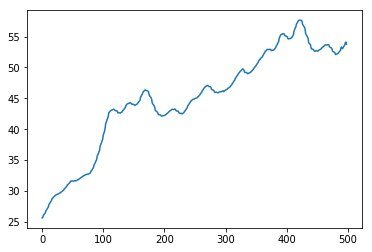

In [15]:
forecast.Close.plot()

In [16]:
df_predict = forecast.filter(['ds', 'Close'])
df_predict = df_predict.set_index('ds')
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 499 entries, 2016-06-30 to 2018-06-18
Data columns (total 1 columns):
Close    499 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


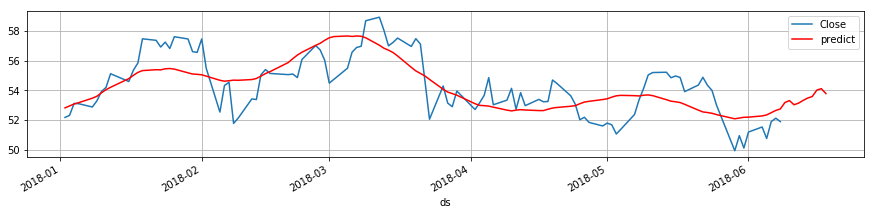

In [17]:
stock.Close['2018'].plot(label='Close', figsize=(15,3), legend=True)
df_predict.Close['2018'].plot(label='predict', grid=True, color='red', legend=True)

<br>
### ** 03 결과 보고서 시각화**

/home/markbaum/Python/python/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/home/markbaum/Python/python/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


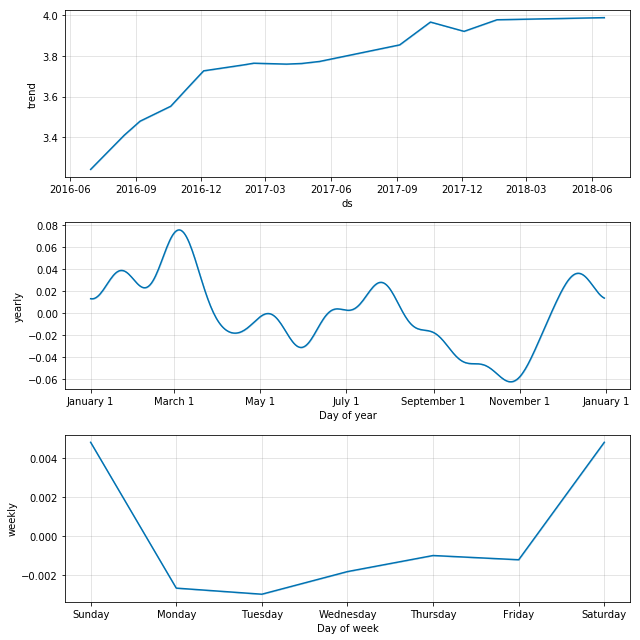

In [18]:
plt = m.plot_components(forecast)
plt.show()